In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/lithium_2019.csv'
df = pd.read_csv(file_path)

columns_to_keep = ['GKGRECORDID', 'DATE', 'DocumentIdentifier', 'Themes', 'V2Themes',
                   'Locations', 'V2Locations', 'Organizations', 'V2Organizations', 'V2Tone', 'FinalThemes']

filtered_df = df[columns_to_keep]
filtered_df = filtered_df[filtered_df['DocumentIdentifier'].str.contains("lithium", case=False, na=False)]
filtered_df.head()

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,FinalThemes
26,20190218201500-563,2019/2/18 20:15,https://www.prnewswire.com:443/news-releases/c...,EPU_ECONOMY_HISTORIC;UNGP_FORESTS_RIVERS_OCEAN...,"GENERAL_GOVERNMENT,3172;EPU_POLICY_GOVERNMENT,...",1#China#CH#CH#35#105#CH;1#Japan#JA#JA#36#138#J...,"4#Dublin, Dublin, Ireland#EI#EI07#18288#53.333...",['schlumberger nv'],"Custom Research,7231;Office Hours Call,7394;Of...",-0.387296669,"TAX_ETHNICITY,GENERAL_GOVERNMENT,NEGOTIATIONS"
207,20190911080000-1081,2019/9/11 8:00,https://finance.yahoo.com/news/tianqi-starts-l...,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;DELAY;U...,"ECON_SUBSIDIES,1125;WB_1948_SUBSIDIES,1125;WB_...",1#Australia#AS#AS#-25#135#AS;1#United States#U...,"4#Beijing, Beijing, China#CH#CH22#13001#39.928...",['albemarle corp'],"Reuters,31;United States,1600",-1.538461538,"TAX_ETHNICITY,DELAY,ECON_SUBSIDIES"
432,20190227141500-31,2019/2/27 14:15,http://globenewswire.com/news-release/2019/02/...,TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_DRILL;MANMAD...,"TAX_FNCACT_EXECUTIVE_OFFICER,5410;TAX_FNCACT_E...","2#New York, United States#US#USNY#42.1497#-74....","2#New York, United States#US#USNY##42.1497#-74...",['cabot oil & gas corp'],"National Instrument,4280;National Instrument,4...",0.106496273,"MANMADE_DISASTER_IMPLIED,ENV_MINING,SLFID_MINE..."
522,20191003084500-1368,2019/10/3 8:45,https://www.wkrb13.com/2019/10/03/prudential-p...,EPU_CATS_REGULATION;EPU_CATS_FINANCIAL_REGULAT...,"ECON_STOCKMARKET,268;ECON_STOCKMARKET,1099;ECO...",NaN,NaN,['prudential financial inc'],"Steward Partners Investment Advisory,1230;Exch...",1.863354037,"ECON_STOCKMARKET,CORRUPTION"
567,20191007214500-1189,2019/10/7 21:45,https://991thewhale.com/endicott-awaits-start-...,LEADER;TAX_FNCACT;TAX_FNCACT_GOVERNOR;TAX_FNCA...,"ECON_BANKRUPTCY,1096;WB_368_LEASING,981;TAX_FN...","2#New York, United States#US#USNY#42.1497#-74....","2#New York, United States#US#USNY##42.1497#-74...",['ibm'],"Ibm,258;Huron Real Estate Associates,872",-0.480769231,"ECON_HOUSING_PRICES,ECON_BANKRUPTCY"


## **Lithium related news stats 2019**
(5) # of days with news

(6) average # of news items per news day

(7) average tone for news days.

(8) average standard deviation of the tone across news items.

In [ ]:
filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'], errors='coerce')
filtered_df['V2Tone'] = pd.to_numeric(filtered_df['V2Tone'], errors='coerce')
filtered_df_cleaned = filtered_df.dropna(subset=['DATE', 'V2Tone'])
grouped_by_date_cleaned = filtered_df_cleaned.groupby(filtered_df_cleaned['DATE'].dt.date)

# Calculate number of days with news
number_of_days_with_news_cleaned = grouped_by_date_cleaned.size().size

# Calculate average number of news items per news day
average_news_items_per_day_cleaned = grouped_by_date_cleaned.size().mean()

# Calculate average tone for news days
average_tone_per_day_cleaned = grouped_by_date_cleaned['V2Tone'].mean().mean()

# Calculate average standard deviation of the tone across news items
average_std_dev_tone_per_day_cleaned = grouped_by_date_cleaned['V2Tone'].std().mean()

print("Number of days with news:", number_of_days_with_news_cleaned)
print("Average number of news items per news day:", average_news_items_per_day_cleaned)
print("Average tone for news days:", average_tone_per_day_cleaned)
print("Average standard deviation of the tone across news items:", average_std_dev_tone_per_day_cleaned)

Number of days with news: 39
Average number of news items per news day: 1.9743589743589745
Average tone for news days: 0.07424783758782051
Average standard deviation of the tone across news items: 0.3266516841111776


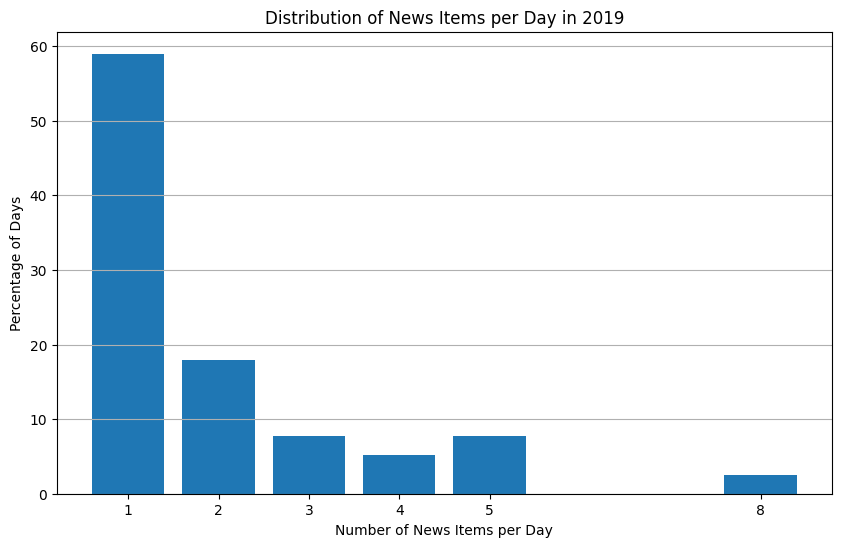

mean 1.9743589743589745
std 1.597484527347514


In [ ]:
import matplotlib.pyplot as plt

news_items_per_day = grouped_by_date_cleaned.size()

# Calculate histogram data
hist_data = news_items_per_day.value_counts(normalize=True).sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(hist_data.index, hist_data.values * 100)
plt.xlabel('Number of News Items per Day')
plt.ylabel('Percentage of Days')
plt.title('Distribution of News Items per Day in 2019')
plt.xticks(hist_data.index)
plt.grid(axis='y')
plt.show()

# Calculate mean and standard deviation of the number of news items per day
mean_news_items_per_day = news_items_per_day.mean()
std_dev_news_items_per_day = news_items_per_day.std()

print("mean",mean_news_items_per_day)
print("std",std_dev_news_items_per_day)


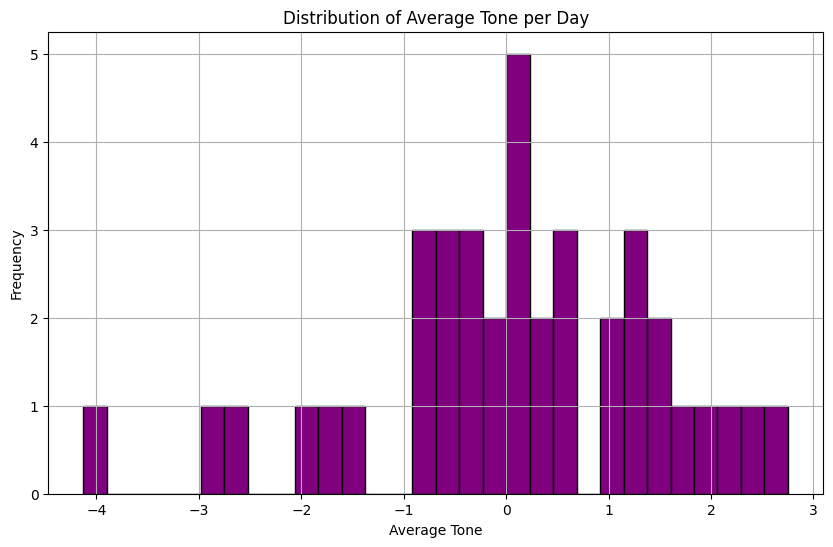

Mean of average tone per day: 0.07424783758782051
Standard deviation of average tone per day: 1.4707794420325992


In [ ]:
mean_tone_per_day = grouped_by_date_cleaned['V2Tone'].mean()
std_dev_tone_per_day = grouped_by_date_cleaned['V2Tone'].std()

# Plot histogram of average tone per day
plt.figure(figsize=(10, 6))
plt.hist(mean_tone_per_day, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Average Tone per Day')
plt.xlabel('Average Tone')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Report mean and standard deviation of the average tone
average_tone_mean = mean_tone_per_day.mean()
average_tone_std_dev = mean_tone_per_day.std()

print("Mean of average tone per day:", average_tone_mean)
print("Standard deviation of average tone per day:", average_tone_std_dev)

In [ ]:
# Calculate the average tone for each day
average_tone_per_day = grouped_by_date_cleaned['V2Tone'].mean()

# Count the number of days with average tone less than -4, -3, and -2
count_tone_less_than_minus_4 = (average_tone_per_day < -4).sum()
count_tone_less_than_minus_3 = (average_tone_per_day < -3).sum()
count_tone_less_than_minus_2 = (average_tone_per_day < -2).sum()

print("Number of days with average tone less than -4:", count_tone_less_than_minus_4)
print("Number of days with average tone less than -3:", count_tone_less_than_minus_3)
print("Number of days with average tone less than -2:", count_tone_less_than_minus_2)

Number of days with average tone less than -4: 1
Number of days with average tone less than -3: 1
Number of days with average tone less than -2: 3


In [ ]:
# Calculate the mean tone for each day again
average_tone_per_day = grouped_by_date_cleaned['V2Tone'].mean()

# Identify the specific dates with average tones below -4, -3, and -2
dates_with_tone_less_than_minus_4 = average_tone_per_day[average_tone_per_day < -4].index
dates_with_tone_less_than_minus_3 = average_tone_per_day[average_tone_per_day < -3].index
dates_with_tone_less_than_minus_2 = average_tone_per_day[average_tone_per_day < -2].index

# Since there might be overlaps, let's display these dates distinctly
print("Specific days with average tone less than -4:", dates_with_tone_less_than_minus_4.tolist())
print("Specific days with average tone less than -3:", dates_with_tone_less_than_minus_3.tolist())
print("Specific days with average tone less than -2:", dates_with_tone_less_than_minus_2.tolist())



Specific days with average tone less than -4: [datetime.date(2019, 9, 12)]
Specific days with average tone less than -3: [datetime.date(2019, 9, 12)]
Specific days with average tone less than -2: [datetime.date(2019, 7, 17), datetime.date(2019, 9, 12), datetime.date(2019, 10, 24)]


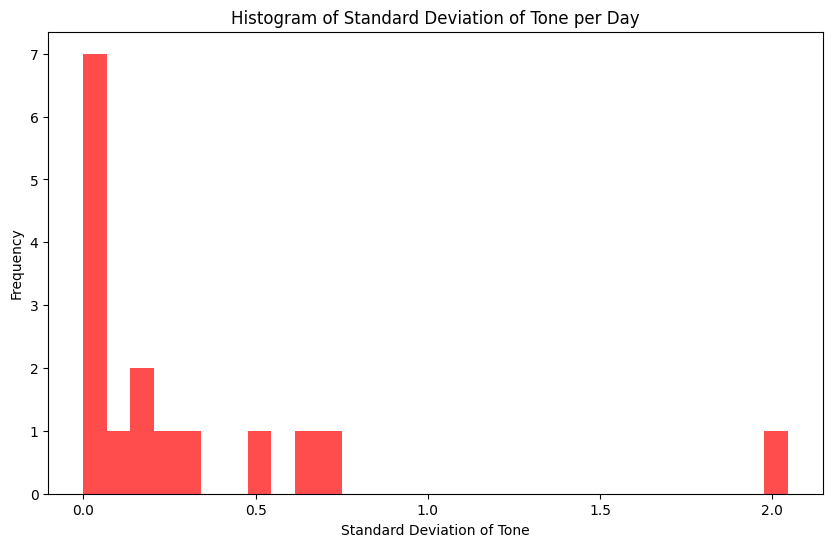

Standard Deviation of Standard Deviation of Tone per Day: 0.5202166283537834


In [ ]:

# Group by date for daily statistics
grouped_by_date = filtered_df_cleaned.groupby(filtered_df_cleaned['DATE'].dt.date)

# Calculate the number of news items per day
news_per_day = grouped_by_date.size()

# Calculate average and standard deviation of tone per day
average_tone_per_day = grouped_by_date['V2Tone'].mean()
std_tone_per_day = grouped_by_date['V2Tone'].std()


# Plotting the histogram of standard deviation of tone per day
plt.figure(figsize=(10, 6))
plt.hist(std_tone_per_day, bins=30, color='red', alpha=0.7)
plt.title('Histogram of Standard Deviation of Tone per Day')
plt.xlabel('Standard Deviation of Tone')
plt.ylabel('Frequency')
plt.show()

print("Standard Deviation of Standard Deviation of Tone per Day:", std_tone_per_day.std())


# **Company intersaction**

In [ ]:
# Load the company list data
company_list_path = '/content/company_list.csv'
company_list_df = pd.read_csv(company_list_path)
company_list_df

,Unnamed: 0,Name,Stock,Exchange,Currency,Time Zone,Market Cap,Notes
0,0,Jiangxi Special Electric Motor,002176.SZ,SHZ,CNY,CST,19213.275140,NaN
1,1,Ganfeng Lithium,002460.SZ,SHZ,CNY,CST,110657.830900,NaN
2,2,Tianqi Lithium,002466.SZ,SHZ,CNY,CST,95878.569980,NaN
3,3,Sichuan Yahua Group,002497.SZ,SHZ,CNY,CST,20699.975680,NaN
4,4,Allkem Limited,AKE.AX,ASX,AUD,AEST,9067.496448,now known as ALKM after merger
5,5,Albemarle,ALB,NYQ,USD,EDT,22788.997120,NaN
6,6,Atlantic Lithium,ALL.L,LSE,GBp,BST,125.040856,NaN
7,7,American Lithium,AMLI,NCM,USD,EDT,306.956640,NaN
8,8,Critical Elements Lithium Corporation,CRE.V,VAN,CAD,EDT,363.700928,NaN
9,9,Eramet SA,ERA.PA,PAR,EUR,CEST,2222.308864,NaN


**Ganfeng Lithium stats**

In [ ]:
pattern = 'Ganfeng Lithium'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
Ganfeng_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
Ganfeng_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
720,20190412171500-1768,2019/4/12 17:15,http://www.mining.com/web/chinas-general-lithi...,TAX_FNCACT;TAX_FNCACT_PRODUCER;TAX_FNCACT_OFFI...,"GENERAL_GOVERNMENT,1251;EPU_POLICY_GOVERNMENT,...","4#Yichang, Hubei, China#CH#CH12#30.7714#111.32...",1#Australia#AS#AS##-25#135#AS#1609;1#Australia...,['albemarle corp'],"Ganfeng Lithium Co,714;Ganfeng Lithium Co,912;...",0.23923445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3759,20190416164500-901,2019/4/16 16:45,https://www.globenewswire.com/news-release/201...,ENV_METALS;WB_507_ENERGY_AND_EXTRACTIVES;EDUCA...,"SOC_POINTSOFINTEREST_COLLEGE,13239;EDUCATION,1...","2#Nevada, United States#US#USNV#38.4199#-117.1...","2#Minnesota, United States#US#USMN##45.7326#-9...","['apple inc', 'fmc corp', 'medtronic plc', 'ca...","Allan Chemical Corp,10241;Bollore Group,8680;M...",-0.305343511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3922,20190412101500-1672,2019/4/12 10:15,https://www.reuters.com/article/china-metals-l...,TAX_FNCACT;TAX_FNCACT_PRODUCER;TAX_FNCACT_OFFI...,"IDEOLOGY,2406;GENERAL_GOVERNMENT,1058;EPU_POLI...","4#Yichang, Hubei, China#CH#CH12#30.7714#111.32...",1#Australia#AS#AS##-25#135#AS#1410;1#Australia...,['albemarle corp'],"Thomson Reuters Trust Principles,2406;Ganfeng ...",0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4208,20190415121500-1496,2019/4/15 12:15,https://energy.einnews.com/pr_news/482134914/g...,ENV_METALS;WB_507_ENERGY_AND_EXTRACTIVES;EDUCA...,"SOC_POINTSOFINTEREST_COLLEGE,13216;EDUCATION,1...","2#Nevada, United States#US#USNV#38.4199#-117.1...","2#Minnesota, United States#US#USMN##45.7326#-9...","['apple inc', 'fmc corp', 'medtronic plc', 'ca...","Allan Chemical Corp,10218;Bollore Group,8657;M...",-0.307062436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6196,20190107220000-1917,2019/1/7 22:00,http://resourceworld.com/index.php/cobalt-27-a...,EPU_ECONOMY_HISTORIC;UNGP_FORESTS_RIVERS_OCEAN...,"EPU_ECONOMY_HISTORIC,318;TAX_FNCACT_CHAIRMAN,1...",1#China#CH#CH#35#105#CH;1#Australia#AS#AS#-25#...,"4#Ramu, Sandaun, Papua New Guinea#PP#PP18#1858...",['capital one financial corp'],"Jiangxi Ganfeng Lithium Co,2252;Neometals Ltd,...",0.922509225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6488,20190412164500-774,2019/4/12 16:45,https://auto.economictimes.indiatimes.com/news...,TAX_FNCACT;TAX_FNCACT_PRODUCER;TAX_FNCACT_OFFI...,"ECON_WORLDCURRENCIES_YUAN,1380;GENERAL_GOVERNM...","4#Yichang, Hubei, China#CH#CH12#30.7714#111.32...",1#Australia#AS#AS##-25#135#AS#1474;1#Australia...,['albemarle corp'],"Ganfeng Lithium Co,783;Lithium Corp,113;Reuter...",0.514138817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**TianQi Stats**

In [ ]:
pattern = 'Tianqi Lithium'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
Tianqi_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
Tianqi_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
3545,20190415171500-491,2019/4/15 17:15,https://www.dailyamerican.com/news/business/na...,EPU_ECONOMY_HISTORIC;TAX_DISEASE;TAX_DISEASE_C...,"WB_1331_HEALTH_TECHNOLOGIES,1731;WB_621_HEALTH...",1#China#CH#CH#35#105#CH;1#Mexico#MX#MX#23#-102...,1#India#IN#IN##20#77#IN#2095;1#United Kingdom#...,['albemarle corp'],"Revenue Service,2814;Albemarle Corporation,351...",1.388888889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3820,20190415174500-2079,2019/4/15 17:45,https://www.bakersfield.com/ap/news/global-lit...,EPU_ECONOMY_HISTORIC;TAX_DISEASE;TAX_DISEASE_C...,"WB_1331_HEALTH_TECHNOLOGIES,1731;WB_621_HEALTH...",1#China#CH#CH#35#105#CH;1#Mexico#MX#MX#23#-102...,1#India#IN#IN##20#77#IN#2095;1#United Kingdom#...,['albemarle corp'],"Revenue Service,2814;Albemarle Corporation,351...",1.388888889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3821,20190415174500-2898,2019/4/15 17:45,https://www.finanznachrichten.de/nachrichten-2...,EPU_ECONOMY_HISTORIC;TAX_DISEASE;TAX_DISEASE_C...,"WB_1331_HEALTH_TECHNOLOGIES,1810;WB_621_HEALTH...",1#China#CH#CH#35#105#CH;1#Mexico#MX#MX#23#-102...,1#India#IN#IN##20#77#IN#2174;1#United Kingdom#...,['albemarle corp'],"Revenue Service,2893;Albemarle Corporation,358...",1.187335092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5305,20190415164500-2301,2019/4/15 16:45,https://www.businesswire.com/news/home/2019041...,TAX_DISEASE;TAX_DISEASE_CONVENTIONAL;GENERAL_H...,"WB_1331_HEALTH_TECHNOLOGIES,1527;WB_621_HEALTH...",1#China#CH#CH#35#105#CH;1#Mexico#MX#MX#23#-102...,1#India#IN#IN##20#77#IN#1891;1#Indonesia#ID#ID...,['albemarle corp'],"Revenue Service,2610;Albemarle Corporation,330...",1.341281669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("V2Tone values for Tianqi_rows:")
print(Tianqi_rows['V2Tone'].tolist())

V2Tone values for Tianqi_rows:
['1.388888889', '1.388888889', '1.187335092', '1.341281669']


In [ ]:
pattern = 'Albemarle'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
Albemarle_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
Albemarle_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
207,20190911080000-1081,2019/9/11 8:00,https://finance.yahoo.com/news/tianqi-starts-l...,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;DELAY;U...,"ECON_SUBSIDIES,1125;WB_1948_SUBSIDIES,1125;WB_...",1#Australia#AS#AS#-25#135#AS;1#United States#U...,"4#Beijing, Beijing, China#CH#CH22#13001#39.928...",['albemarle corp'],"Reuters,31;United States,1600",-1.538461538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,20190412171500-1768,2019/4/12 17:15,http://www.mining.com/web/chinas-general-lithi...,TAX_FNCACT;TAX_FNCACT_PRODUCER;TAX_FNCACT_OFFI...,"GENERAL_GOVERNMENT,1251;EPU_POLICY_GOVERNMENT,...","4#Yichang, Hubei, China#CH#CH12#30.7714#111.32...",1#Australia#AS#AS##-25#135#AS#1609;1#Australia...,['albemarle corp'],"Ganfeng Lithium Co,714;Ganfeng Lithium Co,912;...",0.23923445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,20190510124500-838,2019/5/10 12:45,https://www.etftrends.com/tactical-allocation-...,ENV_MINING;TAX_ETHNICITY;TAX_ETHNICITY_SALAR;T...,"BAN,1905;EPU_POLICY_REGULATORY,1882;EPU_ECONOM...","4#La Negra, Antofagasta, Chile#CI#CI03#-23.8#-...",1#Chile#CI#CI##-30#-71#CI#159;1#Chile#CI#CI##-...,['albemarle corp'],"Reuters,746;Reuters,1434;Reuters,2175;Albemarl...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,20190430170000-751,2019/4/30 17:00,https://www.marketwatch.com/press-release/addi...,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_ANALYSTS;...,"WB_2048_COMPENSATION_CAREERS_AND_INCENTIVES,10...","1#Australia#AS#AS#-25#135#AS;4#Catamarca, Cata...","4#Port Hedland, Western Australia, Australia#A...",['albemarle corp'],"Livent Corp,3011;Livent Corp,3213;Metals Inc,1...",1.040582726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1659,20190430183000-1328,2019/4/30 18:30,http://www.baystreet.ca/stockstowatch/5696/Add...,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_ANALYSTS;...,"WB_2048_COMPENSATION_CAREERS_AND_INCENTIVES,95...","1#Australia#AS#AS#-25#135#AS;4#Catamarca, Cata...","4#Port Hedland, Western Australia, Australia#A...",['albemarle corp'],"Livent Corp,2672;Livent Corp,2808;Metals Inc,1...",1.127395716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,20190524201500-782,2019/5/24 20:15,https://www.investorideas.com/news/2019/mining...,TAX_ETHNICITY;TAX_ETHNICITY_AMERICAN;MANMADE_D...,"SOC_POINTSOFINTEREST_SCHOOL,6792;TAX_FNCACT_LE...",1#China#CH#CH#35#105#CH;1#Mexico#MX#MX#23#-102...,1#Mexico#MX#MX##23#-102#MX#5849;1#America#US#U...,['albemarle corp'],"First Cobalt Corp,337;First Cobalt Corp,6087;F...",1.690140845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2186,20190911071500-23,2019/9/11 7:15,https://www.forbes.com/sites/timtreadgold/2019...,TAX_ECON_PRICE;WB_350_FINANCIAL_INFRASTRUCTURE...,"EPU_POLICY_GOVERNMENT,1805;EPU_POLICY_GOVERNME...",1#Australia#AS#AS#-25#135#AS;1#Congo#CF#CF#-1#...,"4#Mutanda, Sofala, Mozambique#MZ#MZ05#21926#-1...","['morgan stanley', 'albemarle corp']","Morgan Stanley,2497;Glencore,1549",-5.183585313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2187,20190911071500-44,2019/9/11 7:15,https://www.reuters.com/article/us-australia-l...,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;DELAY;U...,"IDEOLOGY,1995;ECON_SUBSIDIES,1126;WB_1948_SUBS...",1#Australia#AS#AS#-25#135#AS;1#United States#U...,"4#Beijing, Beijing, China#CH#CH22#13001#39.928...",['albemarle corp'],"Thomson Reuters Trust Principles,1995;United S...",-1.208459215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2527,20191019193000-898,2019/10/19 19:30,https://www.wealthdaily.com/articles/charged-u...,WB_507_ENERGY_AND_EXTRACTIVES;WB_525_RENEWABLE...,"WB_135_TRANSPORT,3089;WB_135_TRANSPORT,3147;WB...","1#Mexico#MX#MX#23#-102#MX;3#Charlotte, North C...","1#Chile#CI#CI##-30#-71#CI#5119;3#Charlotte, No...","['nasdaq inc', 'nextera energy inc', 'albemarl...","Global Clean Energy,2191;International Renewab...",0.071581961,...,NaN,N

In [ ]:
pattern = 'Lithium Americas'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
Americas_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
Americas_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
5052,20190917131500-21,2019/9/17 13:15,https://www.prnewswire.com/news-releases/lates...,MANMADE_DISASTER_IMPLIED;TAX_DISEASE;TAX_DISEA...,"TAX_FNCACT_EXECUTIVE_OFFICER,8136;UNGP_FORESTS...","1#Cuba#CU#CU#22#-79.5#CU;2#Florida, United Sta...","4#Ramu, Ciudad De La Habana, Cuba#CU#CU02#1460...",['capital one financial corp'],"Lithium Americas Corp,1635;Lithium Americas Co...",-0.495594714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7061,20190917133000-1995,2019/9/17 13:30,https://www.prnewswire.co.uk/news-releases/lat...,MANMADE_DISASTER_IMPLIED;TAX_DISEASE;TAX_DISEA...,"TAX_FNCACT_EXECUTIVE_OFFICER,8148;UNGP_FORESTS...","1#Cuba#CU#CU#22#-79.5#CU;2#Florida, United Sta...","4#Ramu, Ciudad De La Habana, Cuba#CU#CU02#1460...",['capital one financial corp'],"Lithium Americas Corp,1641;Lithium Americas Co...",-0.495049505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pattern = 'Livent Corp'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
livent_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
livent_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
1313,20190430170000-751,2019/4/30 17:00,https://www.marketwatch.com/press-release/addi...,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_ANALYSTS;...,"WB_2048_COMPENSATION_CAREERS_AND_INCENTIVES,10...","1#Australia#AS#AS#-25#135#AS;4#Catamarca, Cata...","4#Port Hedland, Western Australia, Australia#A...",['albemarle corp'],"Livent Corp,3011;Livent Corp,3213;Metals Inc,1...",1.040582726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1659,20190430183000-1328,2019/4/30 18:30,http://www.baystreet.ca/stockstowatch/5696/Add...,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_ANALYSTS;...,"WB_2048_COMPENSATION_CAREERS_AND_INCENTIVES,95...","1#Australia#AS#AS#-25#135#AS;4#Catamarca, Cata...","4#Port Hedland, Western Australia, Australia#A...",['albemarle corp'],"Livent Corp,2672;Livent Corp,2808;Metals Inc,1...",1.127395716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5257,20190430163000-618,2019/4/30 16:30,http://www.baystreet.ca/articles/stockstowatch...,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_ANALYSTS;...,"WB_2048_COMPENSATION_CAREERS_AND_INCENTIVES,95...","1#Australia#AS#AS#-25#135#AS;4#Catamarca, Cata...","4#Port Hedland, Western Australia, Australia#A...",['albemarle corp'],"Livent Corp,2672;Livent Corp,2808;Metals Inc,1...",1.127395716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6789,20190222141500-2339,2019/2/22 14:15,https://news.yahoo.com/lithium-etf-one-month-h...,TAX_FNCACT;TAX_FNCACT_PRODUCER;EPU_ECONOMY_HIS...,"GENERAL_GOVERNMENT,2227;EPU_POLICY_GOVERNMENT,...",1#China#CH#CH#35#105#CH;1#Australia#AS#AS#-25#...,1#South Korea#KS#KS##37#127.5#KS#2740;1#Chines...,['albemarle corp'],"Bloomberg,688;Bloomberg,2302;Livent Corp,1421;...",1.587301587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pattern = 'Standard lithium'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
sli_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
sli_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
3327,20190503161500-19,2019/5/3 16:15,https://www.dailymail.co.uk/sciencetech/articl...,SHORTAGE;ENV_METALS;WB_507_ENERGY_AND_EXTRACTI...,"TAX_FNCACT_ASSISTANT,1723;UNGP_FORESTS_RIVERS_...",1#Australia#AS#AS#-25#135#AS;1#United States#U...,1#Democratic Republic Of The Congo#CG#CG##0#25...,"['freeport-mcmoran inc', 'tesla inc']","Department Of Energy,2866;Freeport-Mcmoran Inc...",-1.267828843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pattern = 'SQM'

# Filter rows where the pattern matches in either 'V2Organizations' or 'Organizations' column
SQM_rows = df[
    df['V2Organizations'].str.contains(pattern, case=False, na=False) |
    df['Organizations'].str.contains(pattern, case=False, na=False)
]
SQM_rows

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
3759,20190416164500-901,2019/4/16 16:45,https://www.globenewswire.com/news-release/201...,ENV_METALS;WB_507_ENERGY_AND_EXTRACTIVES;EDUCA...,"SOC_POINTSOFINTEREST_COLLEGE,13239;EDUCATION,1...","2#Nevada, United States#US#USNV#38.4199#-117.1...","2#Minnesota, United States#US#USMN##45.7326#-9...","['apple inc', 'fmc corp', 'medtronic plc', 'ca...","Allan Chemical Corp,10241;Bollore Group,8680;M...",-0.305343511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4208,20190415121500-1496,2019/4/15 12:15,https://energy.einnews.com/pr_news/482134914/g...,ENV_METALS;WB_507_ENERGY_AND_EXTRACTIVES;EDUCA...,"SOC_POINTSOFINTEREST_COLLEGE,13216;EDUCATION,1...","2#Nevada, United States#US#USNV#38.4199#-117.1...","2#Minnesota, United States#US#USMN##45.7326#-9...","['apple inc', 'fmc corp', 'medtronic plc', 'ca...","Allan Chemical Corp,10218;Bollore Group,8657;M...",-0.307062436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# List of all DataFrames to merge
dataframes = [Ganfeng_rows, Tianqi_rows, Albemarle_rows, Americas_rows, livent_rows, sli_rows, SQM_rows]

# Concatenate all DataFrames into one
upcom_df = pd.concat(dataframes, ignore_index=True)

# Display the head of the merged DataFrame to verify
upcom_df.head()

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,20190412171500-1768,2019/4/12 17:15,http://www.mining.com/web/chinas-general-lithi...,TAX_FNCACT;TAX_FNCACT_PRODUCER;TAX_FNCACT_OFFI...,"GENERAL_GOVERNMENT,1251;EPU_POLICY_GOVERNMENT,...","4#Yichang, Hubei, China#CH#CH12#30.7714#111.32...",1#Australia#AS#AS##-25#135#AS#1609;1#Australia...,['albemarle corp'],"Ganfeng Lithium Co,714;Ganfeng Lithium Co,912;...",0.23923445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20190416164500-901,2019/4/16 16:45,https://www.globenewswire.com/news-release/201...,ENV_METALS;WB_507_ENERGY_AND_EXTRACTIVES;EDUCA...,"SOC_POINTSOFINTEREST_COLLEGE,13239;EDUCATION,1...","2#Nevada, United States#US#USNV#38.4199#-117.1...","2#Minnesota, United States#US#USMN##45.7326#-9...","['apple inc', 'fmc corp', 'medtronic plc', 'ca...","Allan Chemical Corp,10241;Bollore Group,8680;M...",-0.305343511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20190412101500-1672,2019/4/12 10:15,https://www.reuters.com/article/china-metals-l...,TAX_FNCACT;TAX_FNCACT_PRODUCER;TAX_FNCACT_OFFI...,"IDEOLOGY,2406;GENERAL_GOVERNMENT,1058;EPU_POLI...","4#Yichang, Hubei, China#CH#CH12#30.7714#111.32...",1#Australia#AS#AS##-25#135#AS#1410;1#Australia...,['albemarle corp'],"Thomson Reuters Trust Principles,2406;Ganfeng ...",0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20190415121500-1496,2019/4/15 12:15,https://energy.einnews.com/pr_news/482134914/g...,ENV_METALS;WB_507_ENERGY_AND_EXTRACTIVES;EDUCA...,"SOC_POINTSOFINTEREST_COLLEGE,13216;EDUCATION,1...","2#Nevada, United States#US#USNV#38.4199#-117.1...","2#Minnesota, United States#US#USMN##45.7326#-9...","['apple inc', 'fmc corp', 'medtronic plc', 'ca...","Allan Chemical Corp,10218;Bollore Group,8657;M...",-0.307062436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20190107220000-1917,2019/1/7 22:00,http://resourceworld.com/index.php/cobalt-27-a...,EPU_ECONOMY_HISTORIC;UNGP_FORESTS_RIVERS_OCEAN...,"EPU_ECONOMY_HISTORIC,318;TAX_FNCACT_CHAIRMAN,1...",1#China#CH#CH#35#105#CH;1#Australia#AS#AS#-25#...,"4#Ramu, Sandaun, Papua New Guinea#PP#PP18#1858...",['capital one financial corp'],"Jiangxi Ganfeng Lithium Co,2252;Neometals Ltd,...",0.922509225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Company summary stats**

Number of days with news

Average number of news items per news day

Average tone for news days

Average standard deviation of the tone across news items

most company seems to have very little data related in 2019, and it is very hard to create a EDAA with data this size.